# Google Play Store Ratings Prediction  -  Kaggle

Google playstore consists of huge number of applications . With each application a rating is associated. A higher rating implies how good that particular application , which is provided by different user .In this project we aim to determine the crucial factors that can help us predict ratings of a application. 

Kaggle Dataset : Google Play Store Apps  (https://www.kaggle.com/lava18/google-play-store-apps) 

In [1]:
# Importing essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',55)

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading & Understanding the dataset

In [2]:
# Reading the dataset

df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.shape

(10841, 13)

In [5]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [7]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

## Data Preparation

Before visualization , preparing the data is important as the data available is in row format which needs to be converted at certain standard

In [8]:
# Converting the datatypes of various features

df['Reviews'] = pd.to_numeric(df['Reviews'] , errors = 'coerce')
df['Reviews'].head()

0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
Name: Reviews, dtype: float64

In [9]:
# Correcting Installs column

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x )
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x )
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Installs'].head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [10]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
523k                     1
779k                     1
14k                      1
237k                     1
857k                     1
Name: Size, Length: 462, dtype: int64

In [11]:
# Correcting Size column 
# Scaling  M ie Millions    ---(to)---> k ie thousands  

df['Size'] = df['Size'].apply(lambda x:x.replace('M' , '000') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x:x.replace('k' , '') if 'k' in str(x) else x)
df['Size'] = pd.to_numeric(df['Size'] , errors='coerce')
df['Size'].head()

0    19000.0
1    14000.0
2        8.7
3    25000.0
4        2.8
Name: Size, dtype: float64

In [12]:
# Prepairing price column

df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [13]:
# removing $ from price column

df['Price'] = df['Price'].apply(lambda x:x.replace('$','') if '$' in str(x) else x)
df['Price'] = pd.to_numeric(df['Price'] , errors='coerce')

In [14]:
df['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [15]:
# Checking all the null values

(df.isnull().sum()/len(df))*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.009224
Size              15.644313
Installs           0.009224
Type               0.009224
Price              0.009224
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [16]:
# Imputing missing values 

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df[['Rating','Size']] = si.fit_transform(df[['Rating','Size']])

In [17]:
# dropping the remaining  missing values 

df.dropna(axis = 0 ,how = 'any' ,inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Visualizaing the Data

[]

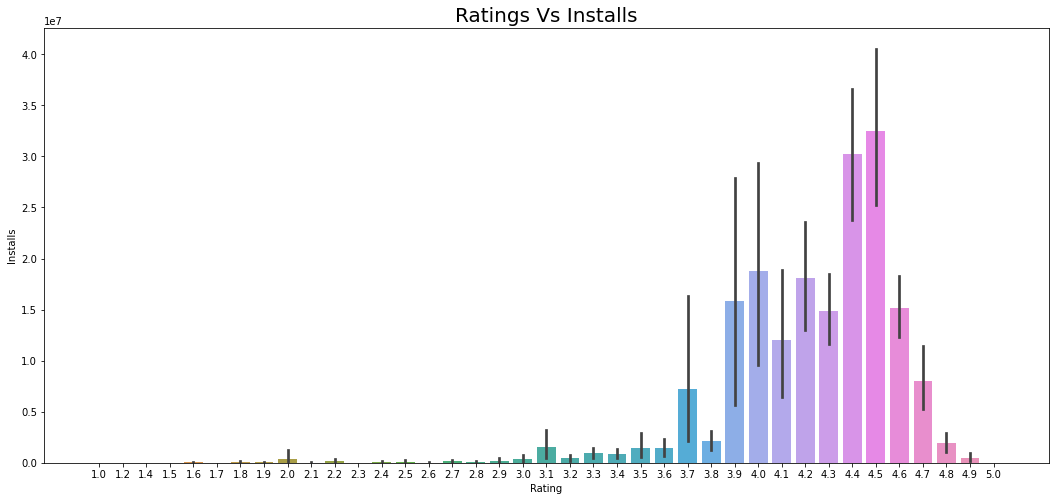

In [20]:
# Plotting Ratings Vs Installs

plt.figure(figsize=(18,8))
sns.barplot(df['Rating'] , df['Installs'])
plt.title('Ratings Vs Installs' ,size = 20)
plt.plot()

[]

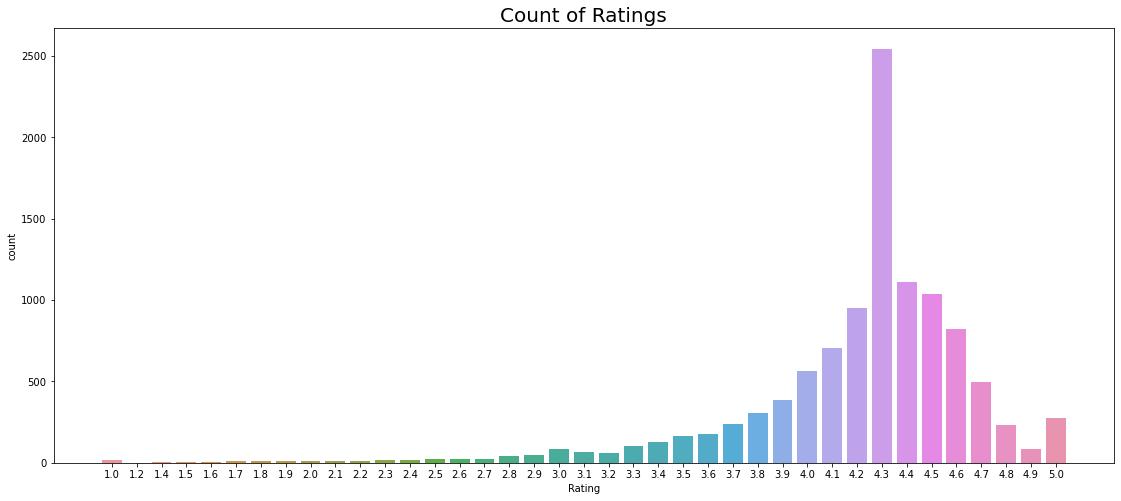

In [21]:
# Plotting Count of ratings

plt.figure(figsize=(19,8))
sns.countplot(x = df['Rating'])
plt.title('Count of Ratings' ,size = 20)
plt.plot()

[]

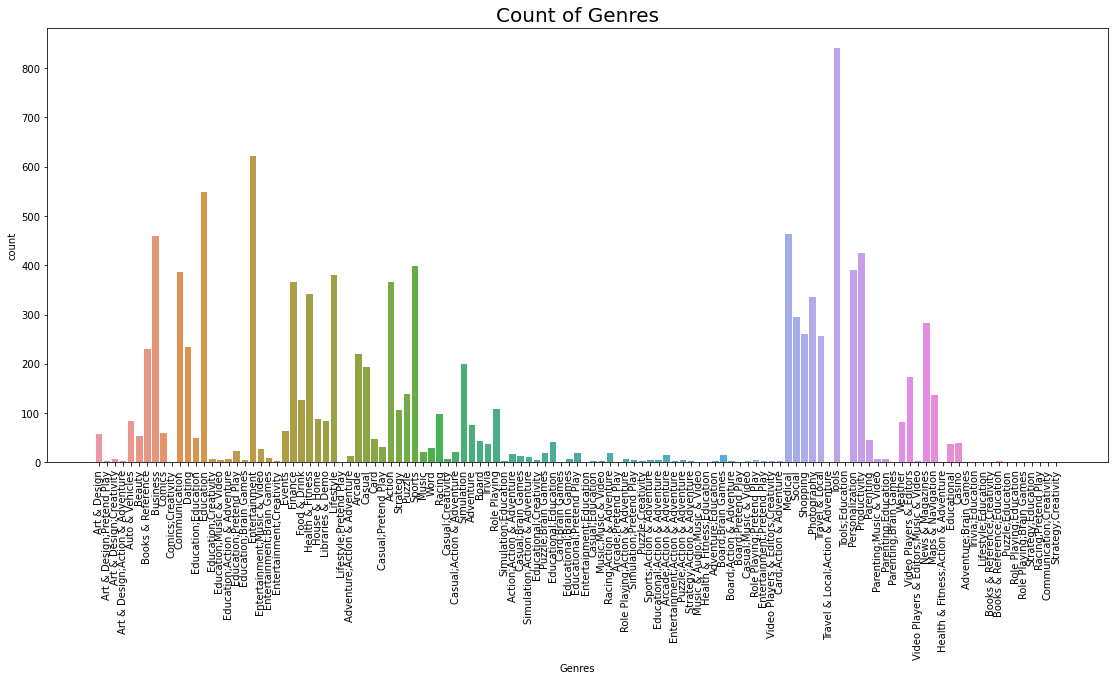

In [22]:
# Plotting Count of genre

plt.figure(figsize=(19,8))
sns.countplot(x = df['Genres'])
plt.title('Count of Genres' ,size = 20)
plt.xticks(rotation =90)
plt.plot()

[]

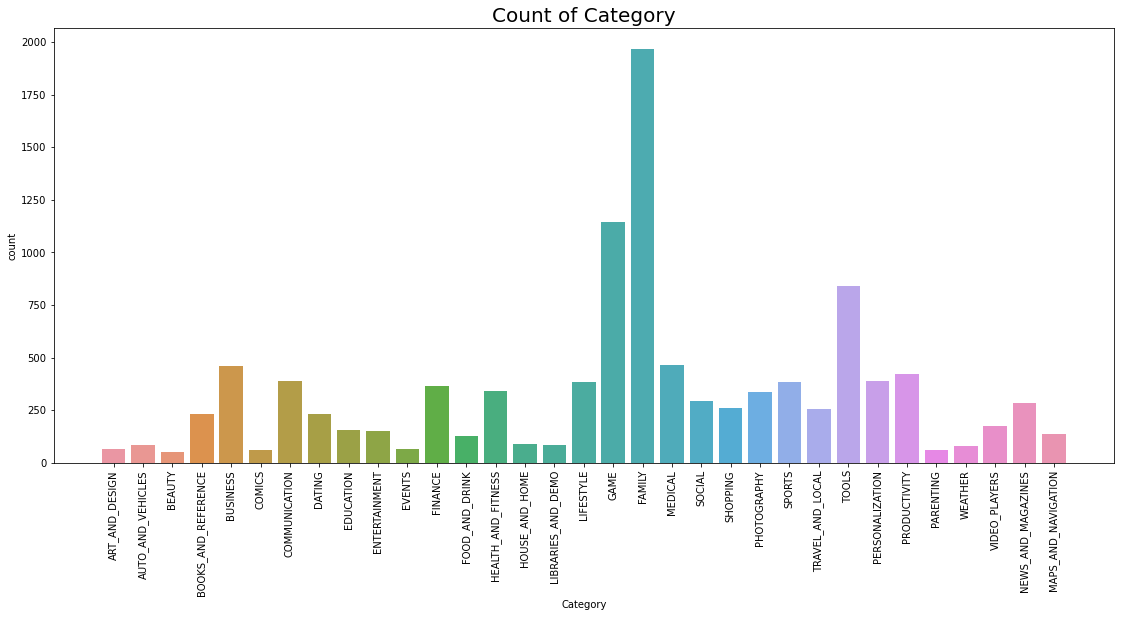

In [23]:
# Plotting Count of Category

plt.figure(figsize=(19,8))
sns.countplot(x = df['Category'])
plt.title('Count of Category' ,size = 20)
plt.xticks(rotation =90)
plt.plot()

[]

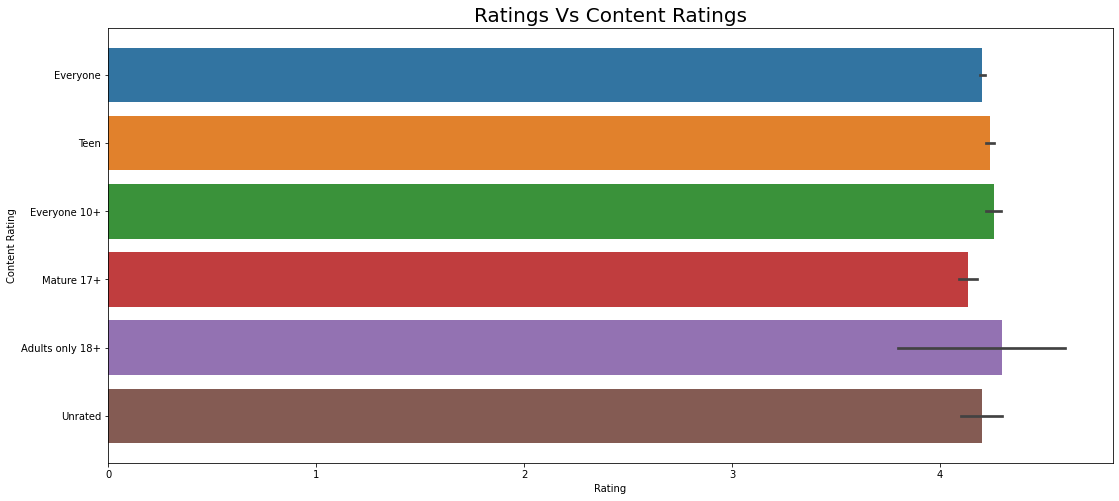

In [24]:
# Plotting Ratings Vs Content Ratings

plt.figure(figsize=(18,8))
sns.barplot(df['Rating'] , df['Content Rating'])
plt.title('Ratings Vs Content Ratings' ,size = 20)
plt.plot()

[]

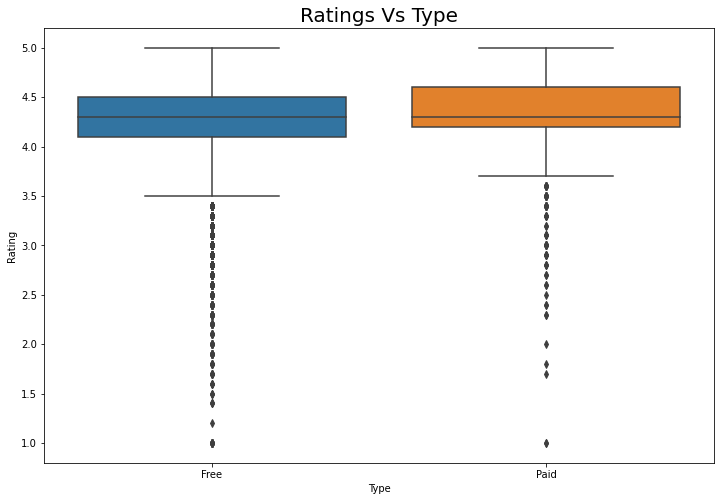

In [25]:
# Plotting Ratings Vs Type of apps 

plt.figure(figsize=(12,8))
sns.boxplot(df['Type'] , df['Rating'])
plt.title('Ratings Vs Type' ,size = 20)
plt.plot()

We can see that paid apps tend to get higher ratings as compared to free apps

[]

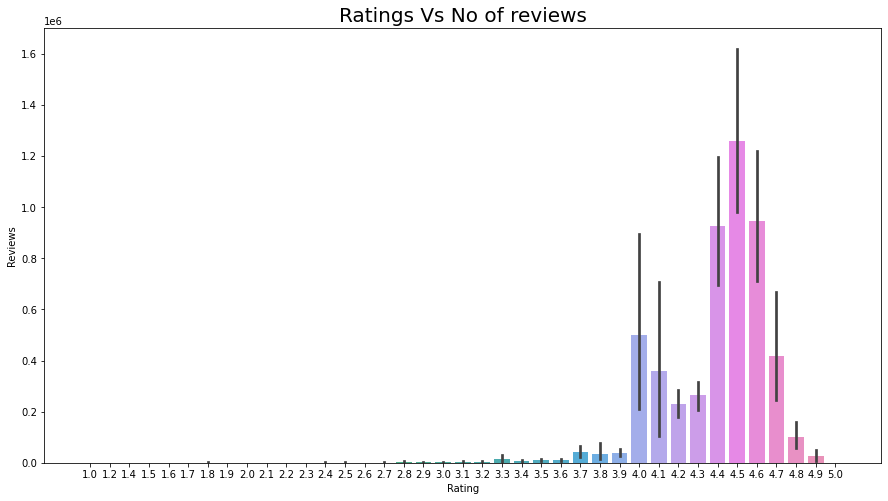

In [26]:
# Plotting Ratings Vs Reviews

plt.figure(figsize=(15,8))
sns.barplot(df['Rating'] , df['Reviews'])
plt.title('Ratings Vs No of reviews' ,size = 20)
plt.plot()

Free apps have more installations as compared to paid apps

[]

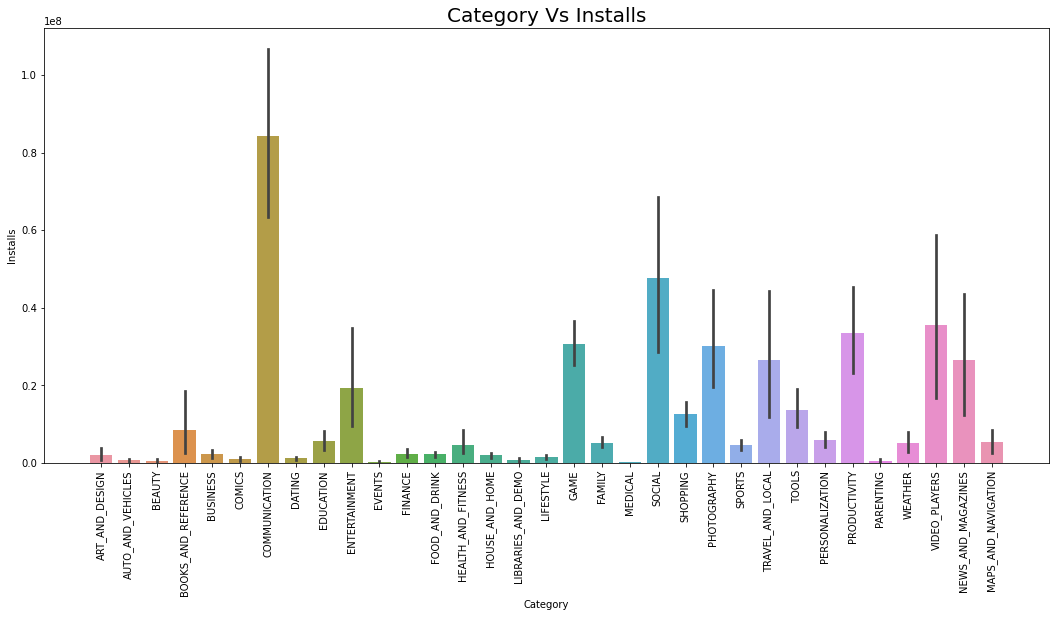

In [27]:
# Plotting Category Vs Installs

plt.figure(figsize=(18,8))
sns.barplot(df['Category'] , df['Installs'] )
plt.title('Category Vs Installs' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

Top 3 categories that users downloaded the most :

    1. Communication
    2. Social Apps
    3. Video Players

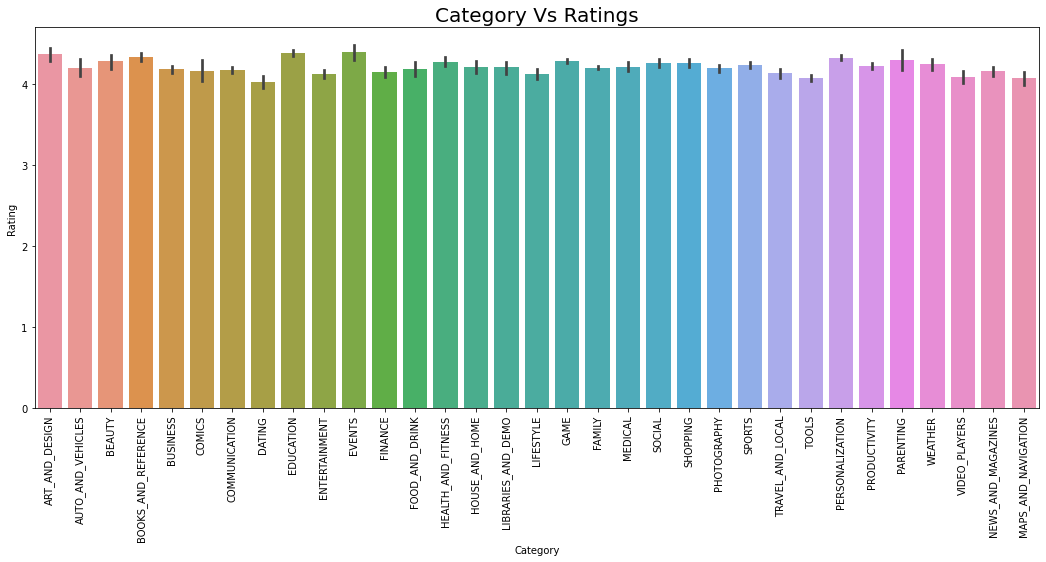

In [28]:
# Plotting Category Vs Ratings

plt.figure(figsize=(18,7))
sns.barplot(df['Category'] , df['Rating'] )
plt.title('Category Vs Ratings' ,size = 20)
plt.xticks(rotation = 90)
plt.show()

[]

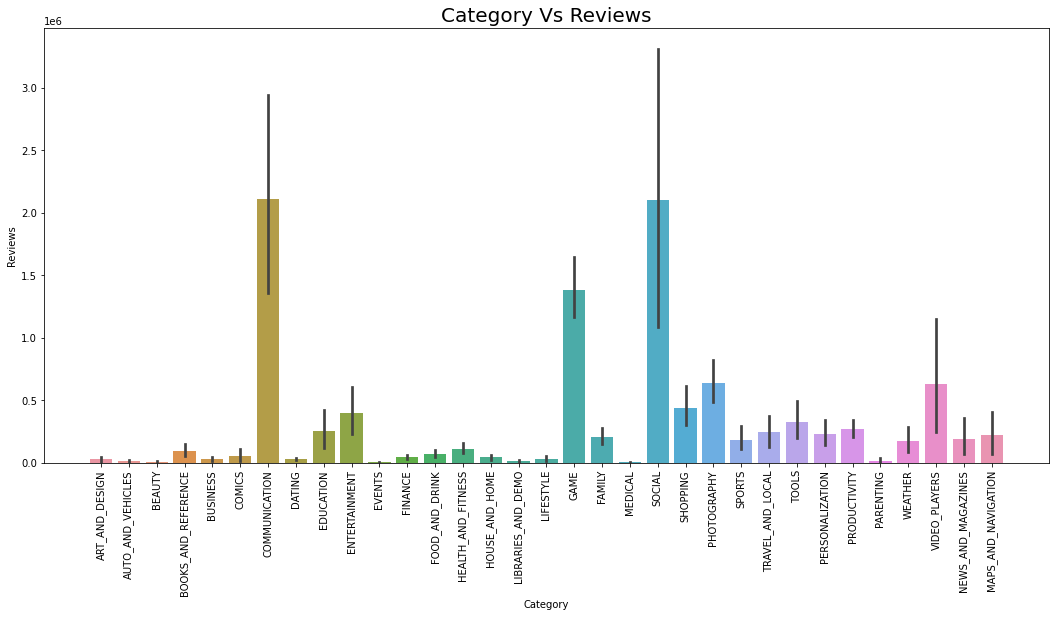

In [29]:
# Plotting Category Vs Reviews

plt.figure(figsize=(18,8))
sns.barplot(df['Category'] , df['Reviews'] )
plt.title('Category Vs Reviews' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

[]

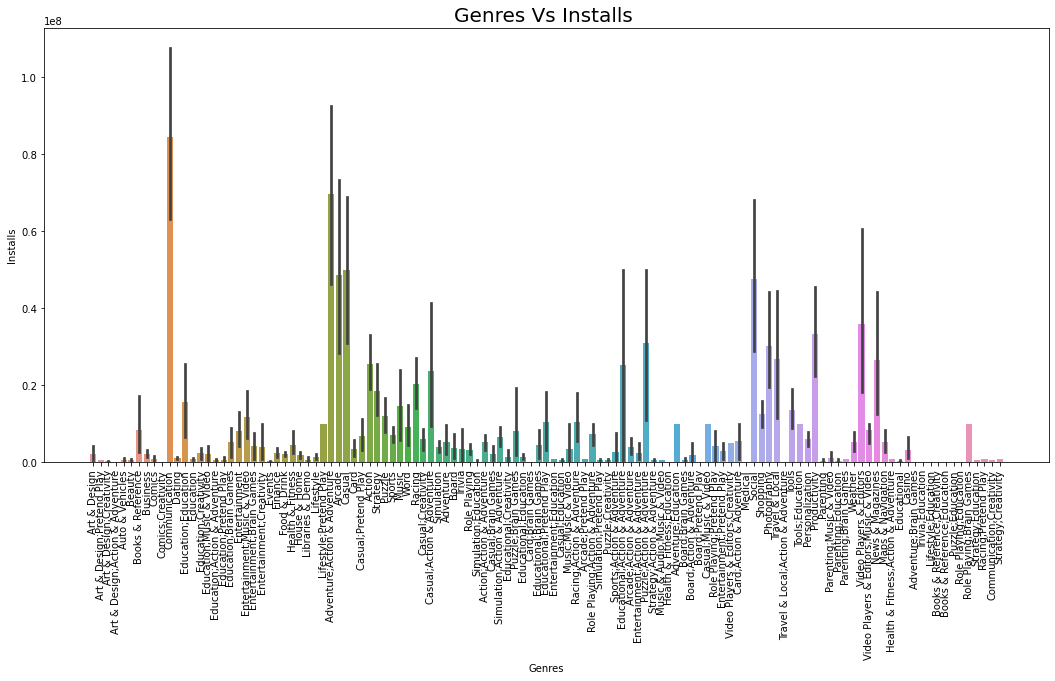

In [30]:
# Plotting Genres Vs Installs 

plt.figure(figsize=(18,8))
sns.barplot(df['Genres'] , df['Installs'] )
plt.title('Genres Vs Installs ' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

[]

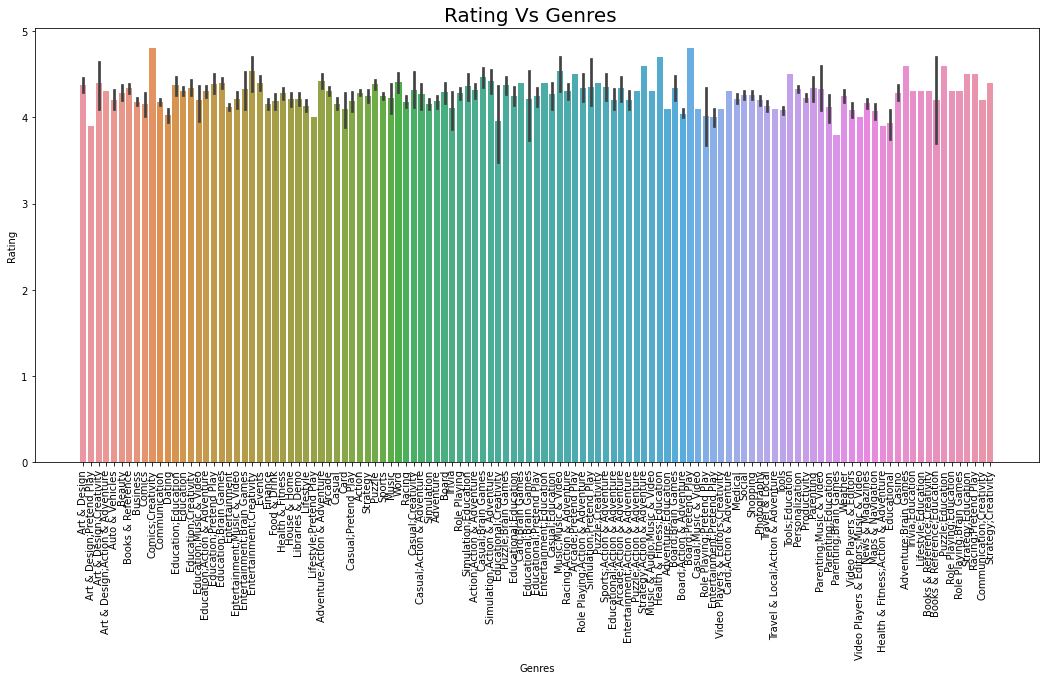

In [31]:
# Plotting  Rating Vs Genres 

plt.figure(figsize=(18,8))
sns.barplot(df['Genres'] , df['Rating'] )
plt.title('Rating Vs Genres  ' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

[]

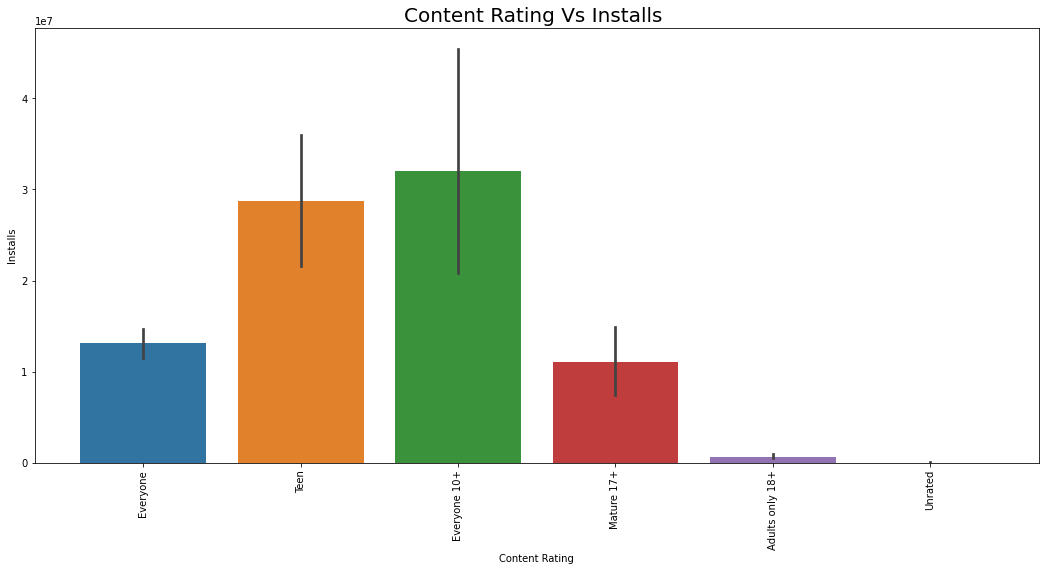

In [32]:
# Plotting Content Rating Vs Installs 

plt.figure(figsize=(18,8))
sns.barplot(df['Content Rating'] , df['Installs'] )
plt.title('Content Rating Vs Installs ' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

[]

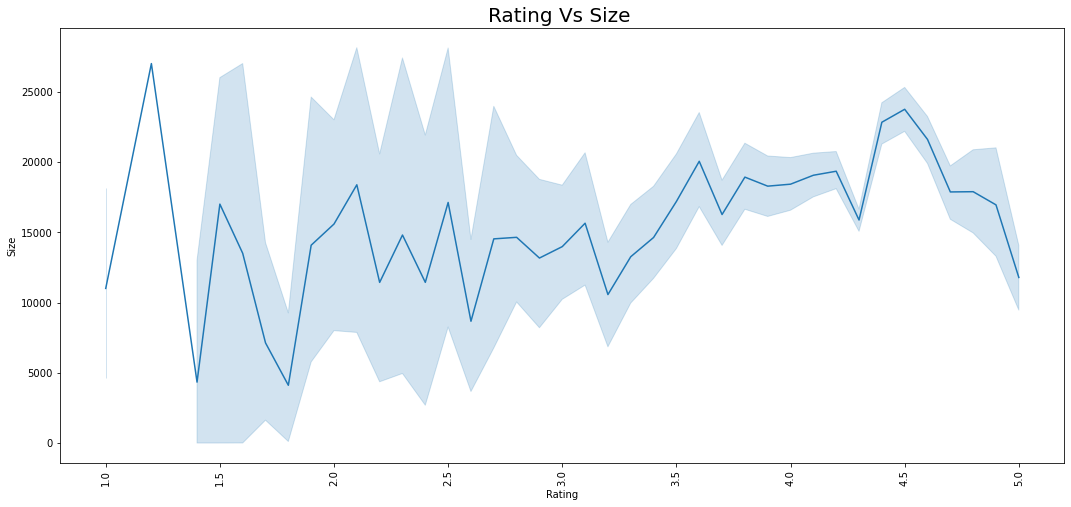

In [33]:
# Plotting Content Rating Vs Size 

plt.figure(figsize=(18,8))
sns.lineplot(df['Rating']  ,df['Size'])
plt.title('Rating Vs Size ' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

[]

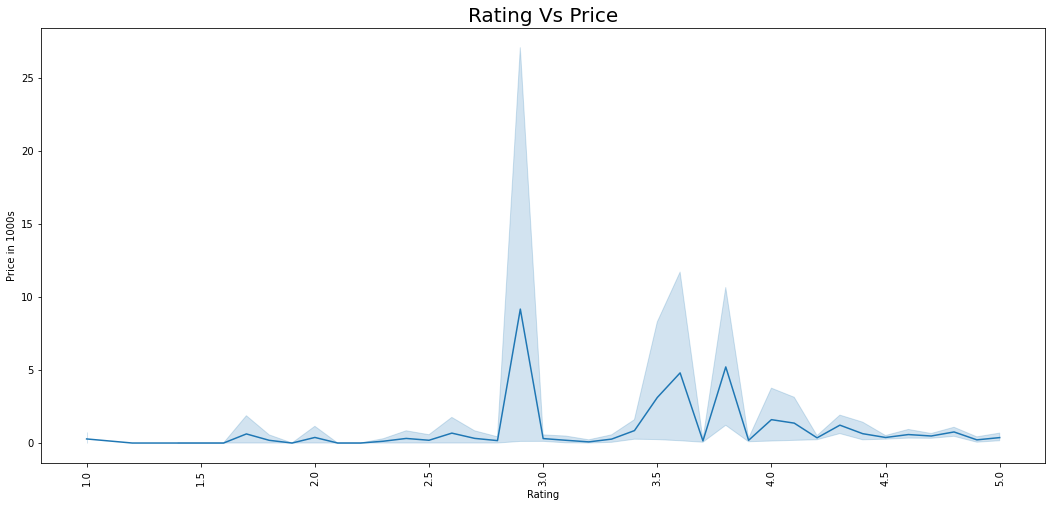

In [34]:
# Plotting  Rating Vs Price 

plt.figure(figsize=(18,8))
sns.lineplot(df['Rating'] , df['Price'])
plt.title('Rating Vs Price' ,size = 20)
plt.ylabel('Price in 1000s')
plt.xticks(rotation = 90)
plt.plot()

[]

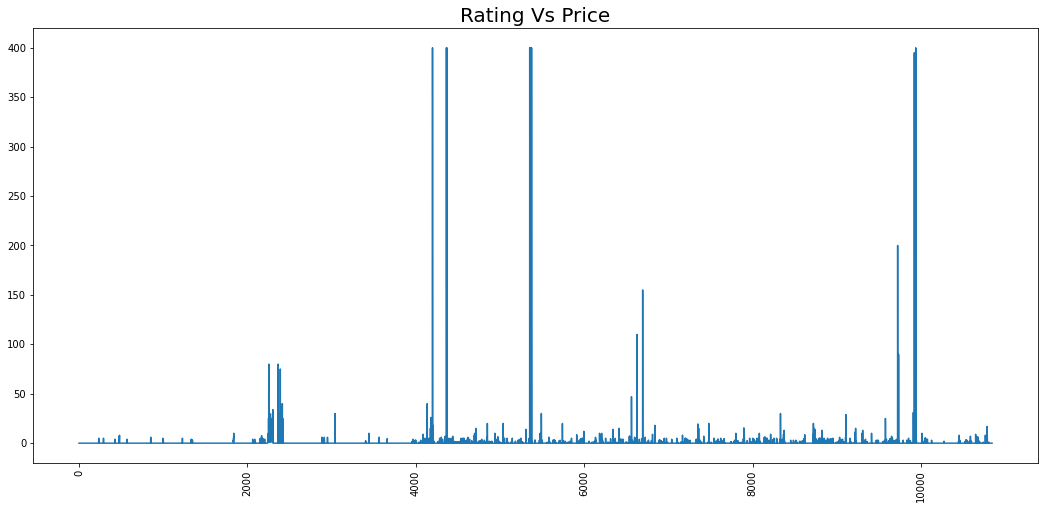

In [35]:
# Plotting  Rating Vs Price 

plt.figure(figsize=(18,8))
plt.plot(df['Price'])
plt.title('Rating Vs Price' ,size = 20)
plt.xticks(rotation = 90)
plt.plot()

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
# Dropping all the unnecessary columns

df.drop(['App','Last Updated' , 'Current Ver' ,  'Android Ver' , 'Genres' ] , 1, inplace= True)

In [38]:
# creating dummies for the following columns

dum_cols = ['Category' , 'Type', 'Content Rating'] 

dummy = pd.get_dummies(df[dum_cols] ,drop_first= True )
df = pd.concat([df,dummy] ,axis= 1 )
df.drop(dum_cols , 1 , inplace = True)
df.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19000.0,10000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.9,967.0,14000.0,500000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.7,87510.0,8.7,5000000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.5,215644.0,25000.0,50000000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.3,967.0,2.8,100000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [39]:
#Converting the scale of size , installs & reviews
df['Installs'] = df['Installs']/1000000 # now in millions
df['Size'] = df['Size']/1024 #now in GB
df['Reviews'] = df['Reviews']/1000

In [40]:
# Scaling the features reviews & Installs

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Reviews','Installs','Size' ,'Price']] = scaler.fit_transform(df[['Reviews','Installs','Size' ,'Price']])

df[['Reviews','Installs','Size' ,'Price']].head()

,Reviews,Installs,Size,Price
0,0.000002,0.00001,0.189992,0.0
1,0.000012,0.00050,0.139991,0.0
2,0.001120,0.00500,0.000077,0.0
3,0.002759,0.05000,0.249992,0.0
4,0.000012,0.00010,0.000018,0.0


## Model Building


In [41]:
# Creating X & y

X = df.drop('Rating' ,1 )
y = df['Rating']

In [42]:
# Creating train-test-split
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train, y_test = train_test_split(X,y,train_size = 0.8 , random_state = 101)

In [43]:
# Fitting the model

from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()
rf.fit(X_train,y_train)
y_test = rf.predict(X_test)

In [44]:

rf.score(X_train,y_train) ,rf.score(X_test,y_test)

(0.8385530227139345, 1.0)

In [45]:
# Selecting top 30 features

top_features = pd.Series(rf.feature_importances_ , X.columns)
top_features = top_features.nlargest(30)
top_features

Size                            0.342746
Reviews                         0.259936
Installs                        0.096772
Price                           0.023153
Category_FAMILY                 0.022926
Category_TOOLS                  0.015551
Category_LIFESTYLE              0.015143
Category_BUSINESS               0.014062
Category_MEDICAL                0.013353
Category_HEALTH_AND_FITNESS     0.012263
Category_GAME                   0.011434
Content Rating_Everyone         0.010937
Category_FINANCE                0.010832
Category_PRODUCTIVITY           0.010042
Content Rating_Teen             0.008687
Category_PHOTOGRAPHY            0.008467
Category_COMMUNICATION          0.008069
Category_SPORTS                 0.008010
Category_DATING                 0.007964
Category_NEWS_AND_MAGAZINES     0.007839
Content Rating_Mature 17+       0.007807
Category_TRAVEL_AND_LOCAL       0.007241
Category_VIDEO_PLAYERS          0.006530
Category_PERSONALIZATION        0.006053
Type_Paid       

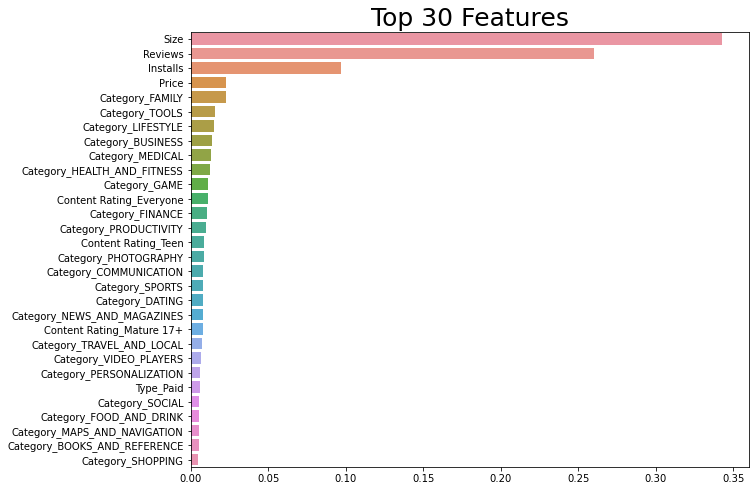

In [46]:
# Top 30 features 

plt.figure(figsize=(10,8))
sns.barplot(top_features.values , top_features.index )
plt.title('Top 30 Features' ,size = 25)
plt.show()

In [47]:
cols = top_features.index
cols

Index(['Size', 'Reviews', 'Installs', 'Price', 'Category_FAMILY',
       'Category_TOOLS', 'Category_LIFESTYLE', 'Category_BUSINESS',
       'Category_MEDICAL', 'Category_HEALTH_AND_FITNESS', 'Category_GAME',
       'Content Rating_Everyone', 'Category_FINANCE', 'Category_PRODUCTIVITY',
       'Content Rating_Teen', 'Category_PHOTOGRAPHY', 'Category_COMMUNICATION',
       'Category_SPORTS', 'Category_DATING', 'Category_NEWS_AND_MAGAZINES',
       'Content Rating_Mature 17+', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_PERSONALIZATION', 'Type_Paid',
       'Category_SOCIAL', 'Category_FOOD_AND_DRINK',
       'Category_MAPS_AND_NAVIGATION', 'Category_BOOKS_AND_REFERENCE',
       'Category_SHOPPING'],
      dtype='object')

In [48]:
# Buidling another model with top 40 features

rf_top = RandomForestRegressor(n_jobs = -1 ,random_state= 500)
rf_top.fit(X_train[cols],y_train)

y_top_pred = rf_top.predict(X_test[cols])
rf_top.score(X_train[cols],y_train)

0.837466227406934

In [49]:
from sklearn.metrics import classification_report,r2_score

In [50]:
r2_score(y_test,y_top_pred)

0.9358197121763561